<a href="https://colab.research.google.com/github/sai1519/My-projects-and-programs/blob/Machine-Learning/Saishta's_Assignment_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# loading the data.
import numpy as np
import pandas as pd

data = pd.read_csv("driver-data.csv")
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [ ]:
data.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [ ]:
data.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [ ]:
# Applying Standard Scaler.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_transform = ss.fit_transform(data)
data_transform

array([[-0.44383803, -0.0898104 ,  1.26061251,  1.13311722],
       [ 0.66207644, -0.43977285,  1.04174351, -1.10182798],
       [ 1.10548146, -0.215131  ,  1.18765617, -1.10182798],
       ...,
       [ 0.41006304,  1.77447381,  0.09331115,  0.01564462],
       [ 1.02407507,  1.87229869, -0.41738319,  0.01564462],
       [-0.79198026,  1.72060465, -0.12555785,  0.01564462]])

In [ ]:
# Determining the number of clusters by using Elbow Method.
from sklearn.cluster import KMeans
inertia = []
cluster_range=range(1,11)
for i in cluster_range:
  km = KMeans(n_clusters =i,init = 'k-means++',max_iter=300, n_init=10, random_state=0)
  km.fit(data_transform)
  inertia.append(km.inertia_)

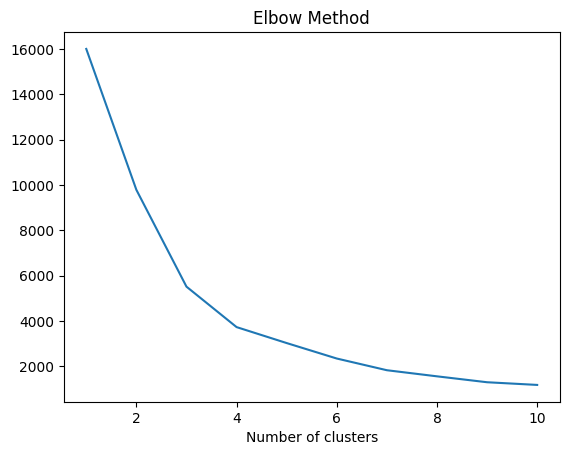

In [ ]:
# Visualizing the data.
import matplotlib.pyplot as plt
plt.plot(range(1,11),inertia)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.show()

In [ ]:
# Training the K-Means model.
k =3
km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(data_transform)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [ ]:
# Add cluster labels to the data.
data["cluster"]=km.labels_
data.head()

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,1
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,1
4,3423310999,54.58,25,1
